In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze data

In [72]:
df = pd.read_csv("salaries_cyber_us_cleaned.csv", index_col=0)

In [73]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_size
0,2022,EN,FT,Security Manager,63000,US,50,S
1,2022,MI,FT,Security Analyst,95000,US,0,M
2,2022,MI,FT,Security Analyst,70000,US,0,M
5,2022,EX,FT,Security Architect,315000,US,100,L
6,2022,SE,FT,Security Researcher,220000,US,100,M


## Let's look at the correlation

<AxesSubplot: xlabel='company_size'>

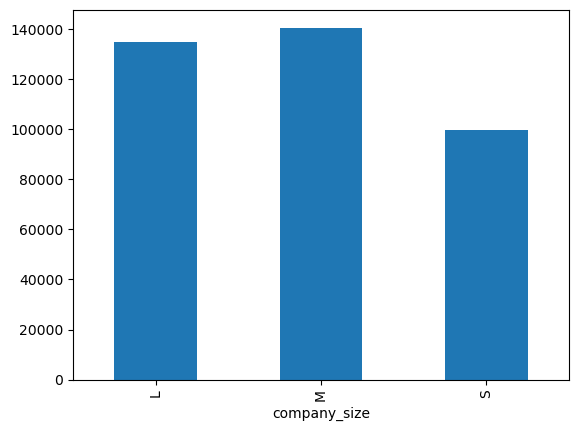

In [74]:
df.groupby("company_size").mean().loc[:, "salary"].plot(kind="bar")

The mean salary at medium sized companies is the highest, while at small sized companies it is the lowest. 

Let's check which experience levels there are:

<AxesSubplot: xlabel='experience_level,company_size'>

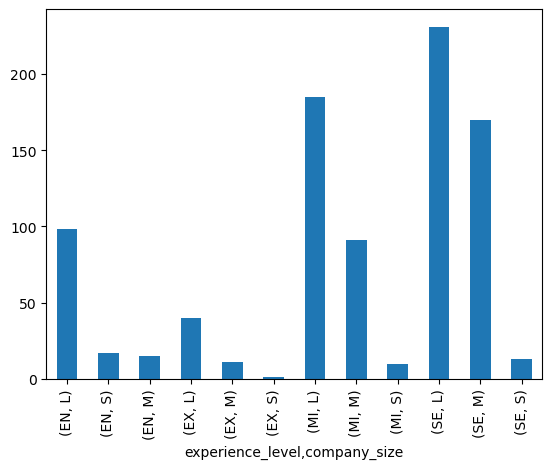

In [75]:
df.loc[:, ["experience_level", "company_size"]].groupby("experience_level").value_counts().plot(kind="bar")

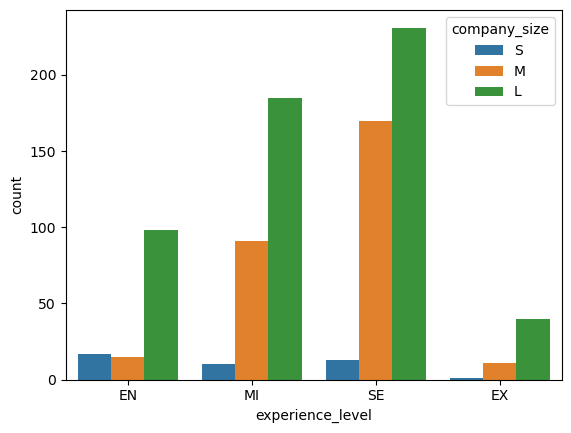

In [76]:
sns.countplot(
    data=df,
    x="experience_level",
    hue="company_size",
    order=["EN", "MI", "SE", "EX"]
);

There is less executive-level data available in smaller companies.

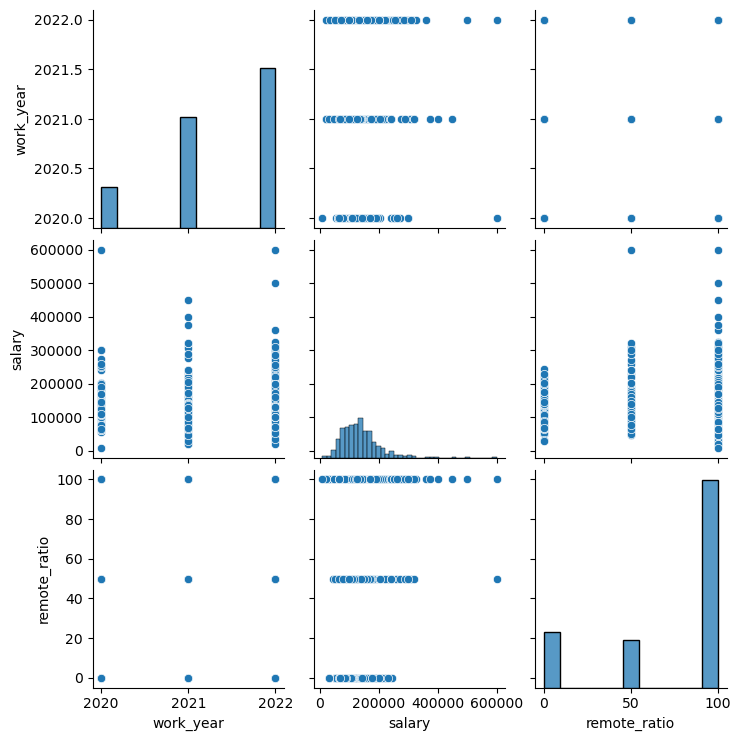

In [77]:
sns.pairplot(df);

## How has the salary change between 2020 and 2022?

In [78]:
mean_salary_per_year = df.loc[:, ["work_year", "salary"]].groupby("work_year").mean()
mean_salary_per_year.head()

,salary
work_year,
2020,132109.060870
2021,121066.232484
2022,145941.083885


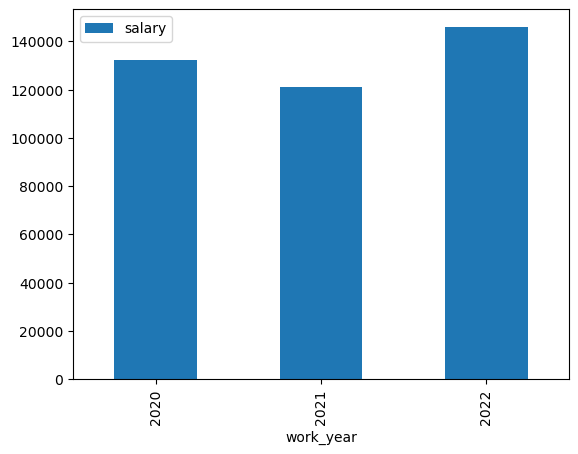

In [79]:
mean_salary_per_year.plot(kind="bar");

<AxesSubplot: xlabel='employment_type'>

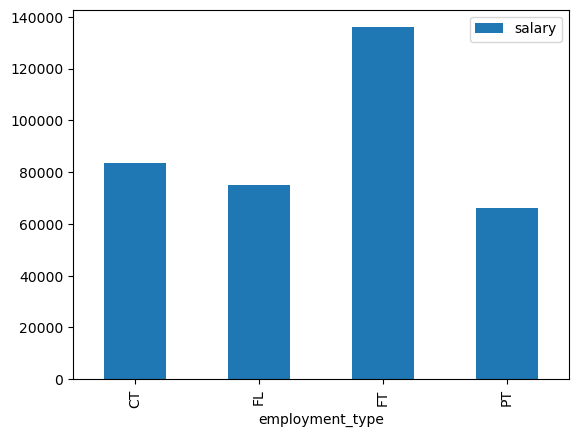

In [80]:
salary_by_employment_type = df.loc[:, ["employment_type", "salary"]].groupby("employment_type").mean()
salary_by_employment_type.plot(kind="bar")

The data set shows that full time employee make the most money in average. But this might be because most of the full time employees are executive?

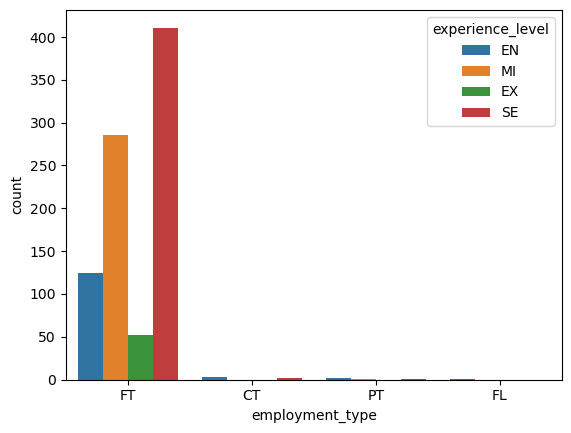

In [81]:
sns.countplot(
    data=df,
    x="employment_type",
    hue="experience_level",
);

There are very few data for Contract, part time and freelance positions, so we should get rid of that data

In [82]:
df_ft = df[ df["employment_type"] == "FT" ]
df_ft.drop("employment_type", inplace=True, axis=1)
df_ft.head()

C:\Users\fahri\AppData\Local\Temp\ipykernel_16600\2285699328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ft.drop("employment_type", inplace=True, axis=1)


,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_size
0,2022,EN,Security Manager,63000,US,50,S
1,2022,MI,Security Analyst,95000,US,0,M
2,2022,MI,Security Analyst,70000,US,0,M
5,2022,EX,Security Architect,315000,US,100,L
6,2022,SE,Security Researcher,220000,US,100,M


## Salaries by job title

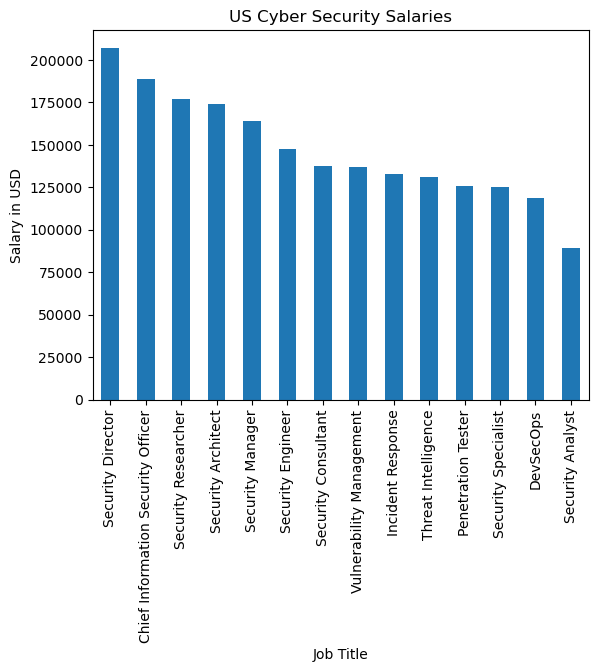

In [95]:
df_ft.loc[:, ["job_title", "salary"]].groupby("job_title").mean().sort_values("salary", ascending=False).plot(kind="bar", xlabel="Job Title", ylabel="Salary in USD", legend=False, title="US Cyber Security Salaries");

## Remote work analysis

In [94]:
df_ft.head()

,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_size
0,2022,EN,Security Manager,63000,US,50,S
1,2022,MI,Security Analyst,95000,US,0,M
2,2022,MI,Security Analyst,70000,US,0,M
5,2022,EX,Security Architect,315000,US,100,L
6,2022,SE,Security Researcher,220000,US,100,M


<AxesSubplot: title={'center': 'U.S. Cyber Security Salary'}, xlabel='Remote Ratio', ylabel='Salary in USD'>

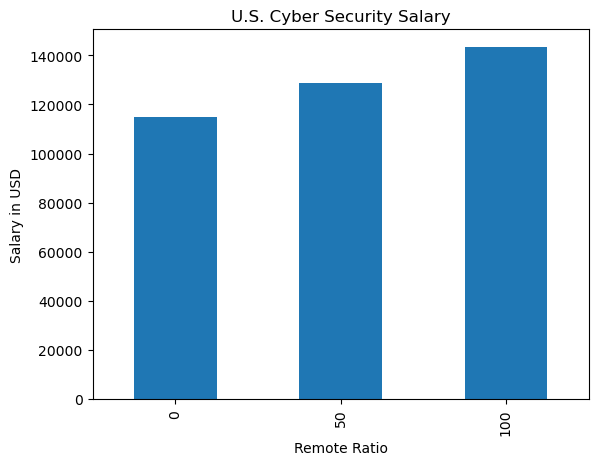

In [98]:
df_ft.loc[:, ["salary", "remote_ratio"]].groupby("remote_ratio").mean().plot(kind="bar", xlabel="Remote Ratio", ylabel="Salary in USD", title="U.S. Cyber Security Salary", legend=False)

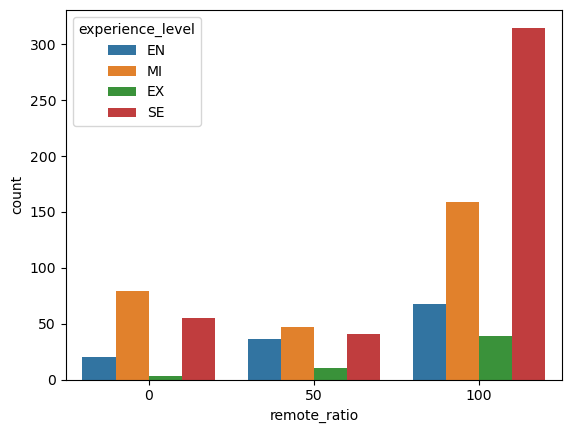

In [102]:
sns.countplot(
    data=df_ft,
    x="remote_ratio",
    hue="experience_level",
);

The first plot shows that a higher remote ratio will result in a higher salary. But this is only because more senior positions, tend to work remote while junior positions have less remote options. 

In [104]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_size
0,2022,EN,FT,Security Manager,63000,US,50,S
1,2022,MI,FT,Security Analyst,95000,US,0,M
2,2022,MI,FT,Security Analyst,70000,US,0,M
5,2022,EX,FT,Security Architect,315000,US,100,L
6,2022,SE,FT,Security Researcher,220000,US,100,M


# Preparing data for model training

In [105]:
df["experience_level"].value_counts()

SE    414
MI    286
EN    130
EX     52
Name: experience_level, dtype: int64

In [106]:
df["employment_type"].value_counts()

FT    872
CT      5
PT      4
FL      1
Name: employment_type, dtype: int64

In [107]:
df["company_size"].value_counts()

L    554
M    287
S     41
Name: company_size, dtype: int64

In [110]:
df_model = df[ (df["employment_type"] == "FT") ]
df_model.drop("employment_type", axis=1, inplace=True)
df_model.head()

C:\Users\fahri\AppData\Local\Temp\ipykernel_16600\3572843097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.drop("employment_type", axis=1, inplace=True)


,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_size
0,2022,EN,Security Manager,63000,US,50,S
1,2022,MI,Security Analyst,95000,US,0,M
2,2022,MI,Security Analyst,70000,US,0,M
5,2022,EX,Security Architect,315000,US,100,L
6,2022,SE,Security Researcher,220000,US,100,M


In [115]:
df_model = df_model.join( pd.get_dummies(df_model["experience_level"]) )
df_model.drop("experience_level", axis=1, inplace=True)
df_model.head()

,work_year,job_title,salary,employee_residence,remote_ratio,company_size,EN,EX,MI,SE
0,2022,Security Manager,63000,US,50,S,1,0,0,0
1,2022,Security Analyst,95000,US,0,M,0,0,1,0
2,2022,Security Analyst,70000,US,0,M,0,0,1,0
5,2022,Security Architect,315000,US,100,L,0,1,0,0
6,2022,Security Researcher,220000,US,100,M,0,0,0,1


In [117]:
df_model.drop("employee_residence", axis=1, inplace=True)
df_model.head()

,work_year,job_title,salary,remote_ratio,company_size,EN,EX,MI,SE
0,2022,Security Manager,63000,50,S,1,0,0,0
1,2022,Security Analyst,95000,0,M,0,0,1,0
2,2022,Security Analyst,70000,0,M,0,0,1,0
5,2022,Security Architect,315000,100,L,0,1,0,0
6,2022,Security Researcher,220000,100,M,0,0,0,1


In [118]:
df_model = df_model.join( pd.get_dummies(df_model["remote_ratio"], prefix="remote_") )
df_model.drop("remote_ratio", axis=1, inplace=True)
df_model.head()

,work_year,job_title,salary,company_size,EN,EX,MI,SE,0,50,100
0,2022,Security Manager,63000,S,1,0,0,0,0,1,0
1,2022,Security Analyst,95000,M,0,0,1,0,1,0,0
2,2022,Security Analyst,70000,M,0,0,1,0,1,0,0
5,2022,Security Architect,315000,L,0,1,0,0,0,0,1
6,2022,Security Researcher,220000,M,0,0,0,1,0,0,1


In [119]:
df_model = df_model.join( pd.get_dummies(df_model["company_size"], prefix="company_size_") )
df_model.drop("company_size", axis=1, inplace=True)
df_model.head()

,work_year,job_title,salary,EN,EX,MI,SE,0,50,100,company_size__L,company_size__M,company_size__S
0,2022,Security Manager,63000,1,0,0,0,0,1,0,0,0,1
1,2022,Security Analyst,95000,0,0,1,0,1,0,0,0,1,0
2,2022,Security Analyst,70000,0,0,1,0,1,0,0,0,1,0
5,2022,Security Architect,315000,0,1,0,0,0,0,1,1,0,0
6,2022,Security Researcher,220000,0,0,0,1,0,0,1,0,1,0


In [121]:
df_model.drop("work_year", axis=1, inplace=True)
df_model.drop("job_title", axis=1, inplace=True)

In [122]:
df_model

,salary,EN,EX,MI,SE,0,50,100,company_size__L,company_size__M,company_size__S
0,63000,1,0,0,0,0,1,0,0,0,1
1,95000,0,0,1,0,1,0,0,0,1,0
2,70000,0,0,1,0,1,0,0,0,1,0
5,315000,0,1,0,0,0,0,1,1,0,0
6,220000,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1238,170000,0,0,0,1,0,0,1,1,0,0
1239,135000,0,0,0,1,0,0,1,1,0,0
1240,100000,1,0,0,0,0,1,0,0,1,0
1244,126000,0,0,0,1,0,0,1,1,0,0


In [123]:
df_model.to_csv("salaries_cyber_model.csv")